# Plánování v umělé inteligenci

TODO: intro (osnova) + motivace (AI - nejen na mape, ale napr. v hrach, ...), programatorske ulohy na soutezich typu InterLoS a na pohovorech do IT firem)

---

## Práce s jupyter notebookem

Obsah buňky spustíte stisknutím `Shift + Enter`.
Po provedení se vypíše výsledek příkazu na posledním řádku
a označí se buňka následující.
Zkuste si to:

In [1]:
items = ['spaceship', 'asteroid', 'wormhole']
items[0]

'spaceship'

Pro zobrazení palety dostupných příkazů zmáčkněnte `Ctrl + Shift + P`.
Najděte klávesovou zkratku pro spuštění buňky bez přesunu na následující buňku (*run selected cells*), abyste mohli opakovaně spouštět jednu buňku, například následující:

In [2]:
items.append('meteoroid')
items

['spaceship', 'asteroid', 'wormhole', 'meteoroid']

Pro našeptávání použijte `Tab`.
Například všechny metody na seznamu *items* zobrazíte pomocí `items.<Tab>`. Zkuste si to:

Pro popis libovolné funkce či metody napište její název, přidejte otazník a buňku spusťe. Zkuste si to:

In [3]:
items.pop?

Co se tedy stane po provedení `items.pop()`?
Domněnku si můžete snadno ověřit:

In [4]:
items = ['spaceship', 'asteroid', 'wormhole']
items.pop()

'wormhole'

In [5]:
items

['spaceship', 'asteroid']

## Nastavení a import funkcí

In [1]:
%matplotlib inline

from search import parse_state, is_goal, actions, move
from search import show_plan, visualize_search, log_search_step

# Hledání cesty ve vesmíru


**Problém:**
Hledáme plán pro raketku ve vesmíru,
podle kterého raketka doletí do cíle,
aniž by po cestě narazila do asteroidu.

**Stav:**
Prostředí tvoří mřížka, některá políčka jsou zablokovaná asteroidy. Raketka začíná někde na spodním řádku a musí doletět do horního řádku.

State(2,0)

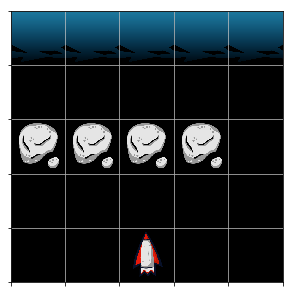

In [2]:
state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'   # A = asteroid
'| | | | | |'
'| | |S| | |')  # S = spaceship
state

**Cílový stav** je takový stav, ve kterém se raketka nachází na horním řádku. Pro testování cílovosti stavu použijte funkci `is_goal(state)`.

In [3]:
# Ukazka stavu, ktery neni cilovy.
state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
is_goal(state)

False

In [4]:
# Ukazka stavu, ktery je cilovy.
state_b = parse_state(
'| | | |S| |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | | | | |')
is_goal(state_b)

True

**Akce:**
Raketka letí stále vpřed a může přitom zatáčet doleva a doprava (dostoupné jsou tedy tři akce: 'l' jako 'left', 'f' jako 'forward', 'r' jako 'right'.

Funkce `actions` vrací seznam akcí dostupných v daném stavu:

In [5]:
actions(state)

['l', 'f', 'r']

Funkce `move(s, a)` vrací stav, který vznikne ze stavu *s* po provedení akce *a*:

State(3,1)

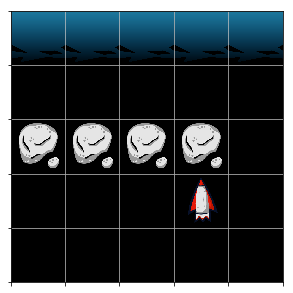

In [6]:
next_state = move(state, 'r')
next_state

Všimněte si, že raketka se při akci `r` posunula nejen o 1 pole doprava, ale současně i o 1 pole vpřed (tj. raketka letí stále vpřed).

V některých stavech nejsou dostupné všechny tři akce, ale jen některé:

In [7]:
actions(next_state)

['r']

**Plán:** Řešením problému je posloupnost akcí, které musí raketka vykonat, aby se dostala do cíle. Příklad plánu je řetězec `"ffl"` (rovně, rovně, doleva).


<div class="alert alert-block alert-success">
**Úkol 1: Dokončení plánu**<br/>
Upravte plán (proměnná *plan*) tak, aby raketka doletěla do cíle. 
</div>

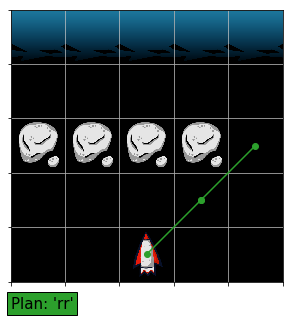

In [8]:
plan = 'rr'  # upravte tento plan
# SOLUTION: plan = 'rrff'
show_plan(state, plan, interactive=False)

<div class="alert alert-block alert-info">
**Shrnutí problému plánování**<br/>
<hr>

<p>
Problém plánování se skládá ze 4 částí:
<ul>
<li>počáteční stav,</li>
<li>funkce `actions(s)` vracející akce dostupné ve stavu *s*,</li>
<li>funkce `move(s, a)` vracející nový stav, který vznikne z *s* provedením *a*,</li>
<li>funkce `is_goal(s)` vracející *True* právě tehdy, když je *s* cílový stav.</li>
</ul>
</p>

Řešením problému je plán, čili posloupnost akcí, která dovede raketku z počátečního stavu do cílového. Pro vizualizaci plánu můžete použít funkci 
`show_plan(initial_state, plan)`.
</div>

# Hladové hledání (Greedy Search)

Na rozehřátí začneme zjednodušením: budeme předpokládat, že je v každém kroku bezpečné použít libovolnou z dostupných akcí, tj. že na mapě nejsou žádné "slepé uličky".

V takovém případě je tvorba plánu jednoduchá: vybíráme jakoukoliv dostupnou akci, dokud se nedostaneme do cíle.

<div class="alert alert-block alert-success">
**Úkol 2: Hladové hledání**<br/>
Implementujte funkci *greedy_search(initial_state)*,
která vrací hladově vytvořený plán pro cestu z *initial_state*
do cílového stavu.
Pokud hladová tvorba plánu selže (v některém stavu už nebude dostupná žádná akce), vraťte částečný plán.

<p>
Budete potřebovat:
<ul>
<li>funkce *actions(s)*, *move(s, a)*, *is_goal(s)*,</li>
<li>vytvoření prázdného plánu: `plan = ''`,</li>
<li>rozšíření plánu o jednu akci: `plan += action`.</li>
</ul>
</p>
</div>

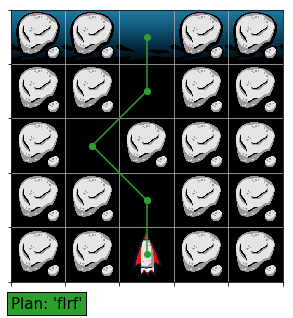

In [9]:
def greedy_search(initial_state):
    plan = []
    # TODO: Implementovat hladove vyhledavani.    
    # Vracime uplny nebo castecny plan.
    return plan

# SOLUTION:
def greedy_search(initial_state):
    state = initial_state
    plan = ''
    while not is_goal(state):
        available_actions = actions(state)
        if not available_actions:
            break # Failed to find a path.
        # Choose the first available action (greedy choice).
        action = available_actions[0]
        state = move(state, action)
        plan += action
    # Return a complete or a partial path.
    return plan

state = parse_state(
'|A|A| |A|A|'
'|A|A| |A|A|'
'|A| |A|A|A|'
'|A|A| |A|A|'
'|A|A|S|A|A|')
plan = greedy_search(state)
show_plan(state, plan, interactive=False)

Vyzkoušejte váš algoritmus i na jiných mapách. Hladové plánování bude dobře fungovat například na mapách s řídce rozmístěnými překážkami.

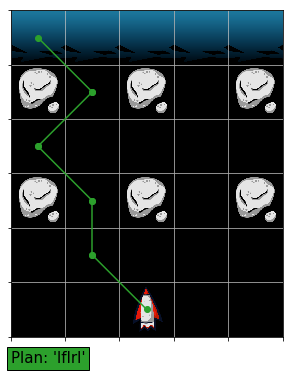

In [10]:
state = parse_state(
'| | | | | |'
'|A| |A| |A|'
'| | | | | |'
'|A| |A| |A|'
'| | | | | |'
'| | |S| | |')
plan = greedy_search(state)
show_plan(state, plan, interactive=False)

<div class="alert alert-block alert-success">
**Úkol 3: Hladové selhání**<br/>
Hladové plánování je rychlé a jednoduché,
nefunguje však ve všech situacích.
Vytvořte plán, ve kterém váš hladový algoritmus cestu do cíle nenajde,
protože skončí ve "slepé uličce".
</div>

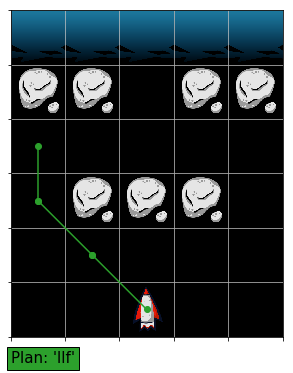

In [11]:
# Upravte tento plan:
state = parse_state(
'| | | | | |'
'|A| | | |A|'
'| | | | | |'
'| | |A| | |'
'| | | | | |'
'| | |S| | |')

# SOLUTION:
state = parse_state(
'| | | | | |'
'|A|A| |A|A|'
'| | | | | |'
'| |A|A|A| |'
'| | | | | |'
'| | |S| | |')

plan = greedy_search(state)
show_plan(state, plan, interactive=False)

<div class="alert alert-block alert-info">
**Shrnutí hladového plánování**<br/>
<hr>

<p>
Princip hladového hledání je volit v každém stavu první dostupnou akci.
Do hladového algoritmu lze snadno zakomponovat preferenci některých akcí (např. protože jsou některé akce levnější než jiné, nebo protože nás posunou blíže k cíli).
Hladové hledání je rychlé a jednoduché, nemusí však vždy najít řešení.
</p>
</div>

# Prohledávání do hloubky (DFS)

Obecně tedy nestačí uvažovat pouze jednu z dostupných akcí. Je možné že se při prohledávání budeme muset "vrátit na rozcestí" a vykonat nějakou jinou akci. Takovýto "průchod s návratem" lze reprezentovat pomocí tzv. *prohledávacího stromu* (anglicky *search tree*), ve kterém vrcholy reprezentují možné stavy a orientované hrany reprezentují akce, které převádějí jeden stav do druhého.

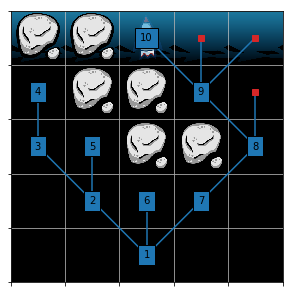

In [33]:
# Ukazka prohledavaciho stromu.
s = parse_state(
'|A|A| | | |'
'| |A|A| | |'
'| | |A|A| |'
'| | | | | |'
'| | |S| | |')

sl = move(s,'l'); sf = move(s,'f'); sr = move(s,'r')
sll = move(sl,'l'); slf = move(sl,'f'); sllf = move(sll,'f')
srr = move(sr,'r'); srrl = move(srr,'l'); srrf = move(srr,'f')
srrll = move(srrl,'l'); srrlf = move(srrl,'f'); srrlr = move(srrl,'r')

# Pro vizualizci jednotlivych kroku nastavte interactive=True.
with visualize_search(s, interactive=False):
    #   expandovany stav,  okraj (fringe)
    log_search_step(s,     [sr, sf, sl])
    log_search_step(sl,    [sr, sf, slf, sll])
    log_search_step(sll,   [sr, sf, slf, sllf])
    log_search_step(sllf,  [sr, sf, slf])
    log_search_step(slf,   [sr, sf])
    log_search_step(sf,    [sr])
    log_search_step(sr,    [srr])
    log_search_step(srr,   [srrf, srrl])
    log_search_step(srrl,  [srrf, srrlr, srrlf, srrll])
    log_search_step(srrll, [srrf, srrlr, srrlf])

Stavy, které jsme již viděli (tj. jsou součástní prohledávácího stromu) se hodí rozdělit do dvou skupin podle toho, zda jsme už do stromu zařadili jejich následníky (říkáme, že jsme ho "expandovali").
Expandované stavy se často označují jako *prozkoumané* (*explored*), zatímco skupině viděných, ale neepxandovaných stavů se říká *okraj* (*fringe*). Na obrázku jsou prozkoumané stavy zobrazené modře, stavy na okraji jsou zobrazeny červeně.

Obecné schéma **stromového prohledávání** (*tree search*) je následovné:
1. Zařaď do okraje počáteční stav.
2. Odeber jeden stav z okraje. Pokud je cílový, skonči.
3. Jinak ho expanduj, tj. zařaď do okraje jeho následníky.
4. Opakuj kroky 2-3, dokuď nenajdeš cílový stav, nebo dokud se nevyprázdní okraj.
5. Pokud se vyprázdnil okraj, tak cesta do cíle neexistuje.

Existuje několik variant stromového prohledávání lišících se ve strategii výběru stavu z okraje k prozkoumání (krok 2).
Vybírat vrchol z okraje lze i náhodně, chytřejším výběrem však můžeme dosáhnout lepších vlastností algoritmu.
Základní variantou s dobrou paměťovou složitostí je **prohledávání do hloubky** (anglicky *depth-first search*, DFS),
při kterém vybíráme z okraje ten stav, který jsme tam zařadili jako poslední. Kroky prohledávání do hloubky můžete vidět i na výše uvedeném příkladu prohledávacího stromu.

Takového chování dosáhneme, když jako datovou strukturu pro okraj použijeme *zásobník* (anglicky *stack*), což je prostě seznam, do kterého přidáváme a odebíráme prvky na stejném konci, stejně jako u štosu knih nebo
talířů naskládaných do sebe.

In [10]:
stack = ['a', 'b', 'c']  # vrchol zasobniku je vpravo ('c')
stack.append('d')  # pridani 'd' na vrchol zasobniku
print(stack)  # ['a', 'b', 'c', 'd']
stack.pop()  # odebrani prvku 'd' z vrcholu zasobniku
print(stack)  # ['a', 'b', 'c']
stack.pop()  # odebrani prvku 'c' z vrcholu zasobniku
print(stack)  # ['a', 'b']

['a', 'b', 'c', 'd']
['a', 'b', 'c']
['a', 'b']


<div class="alert alert-block alert-success">
**Úkol 4: Prohledávání do hloubky**<br/>
Implementujte funkci *dfs(initial_state)*,
která vrací plán pro cestu z *initial_state* do cílového stavu
nalezený pomocí prohledávání do hloubky.

<p>
Tipy:
<ul>
<li>Použijte zásobník pro ukládání stavů na okraji.</li>
<li>Pro každý viděný stav si uložte jeho plán do slovníku.<br>
    Vytvoření a uložení nového plánu provedete takto:<br>
    `plans[next_state] = plans[state] + action`.<br>
    Když pak najdete cílový stav, stačí vrátit `plans[state]`.
    </li>
<li>Akce můžete procházet v převráceném pořadí pomocí `reversed(actions(s))`.</li>
<li>Abyste zabránily opakovanému prozkoumávání stejných stavů,
    do kterých se lze dostat více cestami,
    přidávejte do zásobníku pouze ještě neviděné stavy.
    Pro všechny již viděné stavy máme nějaký plán,
    takže kontrola může vypadat takto:
    `if next_state not in plans: ...`.</li>
</ul>
</p>
</div>

TODO: zvazit poznamku o tom, ze to neni uplne korektni DFS (teda pro vsechny nase svety mozna ano, ale obecne ne), prip. zvazit komplikovanejsi korektni verzi nebo Hlineneho verzi s opakovanym ukladnanim do zasobniku.

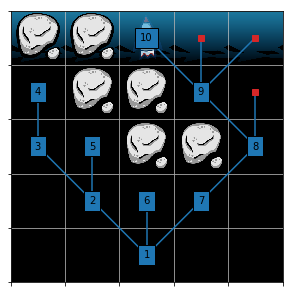

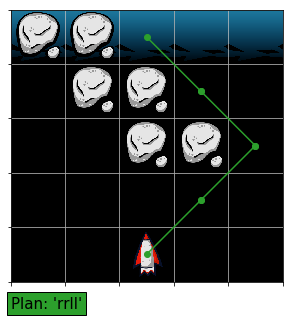

In [38]:
def dfs(initial_state):
    stack = [initial_state]
    plans = {initial_state: ''}
    while stack:
        # TODO: Doplnte kroky 2 a 3 popisu vyse:
        # - Odeberte jeden stav ze zasobniku.
        # - Zkontrolujte, zda je cilovy (pokud ano, vratte plan).
        # - Pridejte na zasobnik vsechny jeho nasledniky,
        #   ktere jsme jeste nevideli.
        # - Ulozte take plany do vsech novych stavu.
        
        log_search_step(state, stack)  # vizualizace
        
        
# SOLUTION:
# Nasledujici algoritmus neprochazi vrcholy v korektnim DFS poradi,
# protoze pridava do zasobniku vsechny zkoumaneho stavu najednou
# a nikdy podruhe (pro zachovani liearni velikosti zasobniku).
# Pri hledani cesty k cilovemu stavu to nicemu nevadi, ale je
# dobre vedet, ze to neni presne DFS a pro nektere jine aplikace
# (napr. detekce orientovanych cyklu) by byl kod potreba upravit.
def dfs(initial_state):
    stack = [initial_state]
    plans = {initial_state: ''}
    while stack:
        state = stack.pop()
        if is_goal(state):
            log_search_step(state, stack)
            return plans[state]
        for action in reversed(actions(state)):
            next_state = move(state, action)
            if next_state not in plans:  # jeste jsme ho nevideli
                stack.append(next_state)
                plans[next_state] = plans[state] + action
        log_search_step(state, stack)
# END-OF-SOLUTION
            
            
state = parse_state(
'|A|A| | | |'
'| |A|A| | |'
'| | |A|A| |'
'| | | | | |'
'| | |S| | |')
with visualize_search(state, interactive=False):
    plan = dfs(state)
show_plan(state, plan)

TODO: shrnuti DFS, zmineni naseho hacku a co s nim, zmineni rekurzivnich verzi, zminění dobré paměťové složitosti, nevýhoda: nemusí obecně najít nejkratší cestu

# Prohledávání do šířky (BFS)

Variantou stromového prohledávní, které najde nejkraší cestu,
je *prohledávání do šířky* (*Breadth-first search*, BFS)
Při BFS využíváme jako okraj frontu, tedy kolekci typu *First-In First-Out* (FIFO), což je prostě seznam, v němž odebíráme z opačné strany, než na kterou přidáváme. Jako u běžné fronty v obchodě.

In [39]:
from collections import deque
queue = deque(['a', 'b', 'c'])  # 'a' na zacatku fronty, 'c' na konci
queue.append('d')  # 'd' prisel na konec fronty
print(queue)  # deque(['a', 'b', 'c', 'd'])
queue.popleft()  # odchazi 'a'
print(queue)  # deque(['b', 'c', 'd'])
queue.popleft()  # odchazi 'b'
print(queue)  # deque(['c', 'd'])

deque(['a', 'b', 'c', 'd'])
deque(['b', 'c', 'd'])
deque(['c', 'd'])


In [16]:
def bfs(initial_state):
    if initial_state.is_goal():
        return [initial_state]
    queue = deque([initial_state])
    tree = {initial_state: None}  # maps states to their parents
    while queue:
        LOGGER.log_search_tree(tree)
        state = queue.popleft()
        for action in actions(state):
            next_state = perform(state, action)
            if (next_state in tree.keys()
                or next_state in queue):
                continue
            queue.append(next_state)
            tree[next_state] = state
            # U BFS lze test na cilovy stav provadet uz zde.
            if next_state.is_goal():
                return reconstruct_path(tree, next_state)

# LOGGER.debug(False)
# state = parse_state(
# '| | | | | |'
# '| | | | | |'
# '|A|A|A|A| |'
# '| | | | | |'
# '| | |S| | |')
# show_path(bfs(state))
LOGGER.debug(False)
state = parse_state(
'| | | | | |'
'| | | |W| |'
'| | | | | |'
'| | |W| | |'
'| | |A| | |'
'| | |S| | |')
show_path(bfs(state))

| | |3| | |
| | | |2| |
| | | | | |
| | |W| | |
| |1|A| | |
| | |0| | |


# Stromové prohledávání (tree search)

Obecně tedy nestačí uvažovat pouze jednu z dostupných akcí. Je možné že se při prohledávání budeme muset "vrátit na rozcestí" a vykonat nějakou jinou akci. Takovýto "průchod s návratem" lze reprezentovat pomocí tzv. *prohledávacího stromu* (anglicky *search tree*), ve kterém vrcholy reprezentují možné stavy a orientované hrany reprezentují akce, které převádějí jeden stav do druhého.

<div class="alert alert-block alert-success">
**Úkol 4: Schéma stromového prohledávání**<br/>
Prostudujte si následující schéma stromového prohledávání,
odkrokujte si ho, prodiskutujte ve dvojici
(TODO: co přesně diskutovat, jaké otázky zodpovědět,
např. vliv okraje, tj. strategie pro výběr stavu k prozkoumání; časová a paměťová složitost)
(TODO: zadat nějakou úpravu kódu?)
</div>

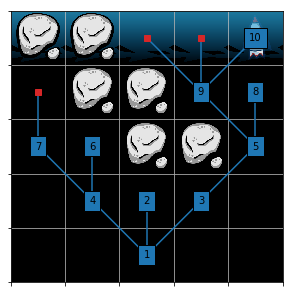

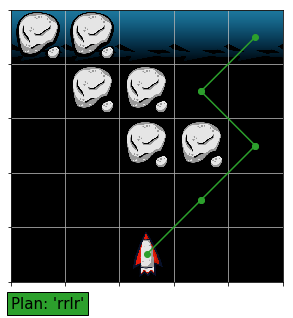

In [14]:
# Obecne schema stromoveho prohledavani.
# Je parametrizovane typem okraje (Fringe), ktery
# popisuje strategii pro vyber stavu k prozkoumani.
def tree_search(initial_state, Fringe):
    # UPDATE: Do okraje ukladame dvojice (stav, plan), kde plan popisuje,
    # jak se dostat do uvedeneho stavu z pocatecniho stavu.
    fringe = Fringe([initial_state])
    plans = {initial_state: ''}
    while fringe:
        # Vyber jednoho stavu z okraje.
        state = fringe.pop()
        # Pokud je tento stav cilovy, muzeme prohledavani ukoncit.
        if is_goal(state):
            log_search_step(state, fringe)
            return plans[state]
        # Pokud neni, expandujeme tento stav, tj. pridame na okraj
        # vsechny jeho nasledniky.
        for action in actions(state):
            next_state = move(state, action)
            plans[next_state] = plans[state] + action
            fringe.add(next_state)
        log_search_step(state, fringe)


state = parse_state(
'|A|A| | | |'
'| |A|A| | |'
'| | |A|A| |'
'| | | | | |'
'| | |S| | |')
with visualize_search(state, interactive=False):
    # Jako okraj muzeme pouzit napriklad mnozinu.
    plan = tree_search(state, Fringe=set)
show_plan(state, plan)

Motivace: pro konkrétní volby okraje, lze algoritmus trochu zjednodušit + získá nějaké pěkné vlastnosti (garance). Množina použítá výše nic moc. Lepší je zásobník (vysvětlit) -> úkol: implementovat DFS: inspirujte se obecným schématem výše, kód bude podobný, jen trochu jednodušší.

In [9]:
# Tree-DFS pomoci rekurze (nehlida zacykleni)
def dfs(state):
    """Return path from state to a goal state"""
    #print('---\nstate:\n' + str(state))
    #input()
    if state.is_goal():
        return [state]
    for action in actions(state):      
        next_state = perform(state, action)
        path = dfs(next_state)
        if path:
            return [state] + path
    return None  # no path found

state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
show_path(dfs(state))

| | |4| | |
| | | |3| |
|A|A|A|A|2|
| | | |1| |
| | |0| | |


In [25]:
# Rekurzivni graph-dfs (hlidajici zacykleni)
def recursive_graph_dfs(start_state):
    explored = set()
    def dfs(state):
        explored.add(state)
        if state.is_goal():
            return [state]
        for action in actions(state):      
            next_state = perform(state, action)
            if next_state in explored:
                continue
            path = dfs(next_state)
            if path:
                return [state] + path
        return None  # no path found
    return dfs(start_state)

state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
show_path(recursive_graph_dfs(state))

| | |4| | |
| | | |3| |
|A|A|A|A|2|
| | | |1| |
| | |0| | |


In [11]:
# Terminology: tree vs. parents?
def reconstruct_path(tree, state):
    reversed_path = []
    while state is not None:
        reversed_path.append(state)
        state = tree[state]
    path = list(reversed(reversed_path))
    return path

    
# tree search - bez kontroly zacykleni
def iterative_dfs(initial_state):
    stack = [initial_state]
    tree = {initial_state: None}  # maps nodes to their parents
    while stack:
        LOGGER.log_search_tree(tree)
        state = stack.pop()
        if state.is_goal():
            return reconstruct_path(tree, state)
        for action in actions(state):
            next_state = perform(state, action)
            stack.append(next_state)
            tree[next_state] = state
            

LOGGER.debug(False)
state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
show_path(iterative_dfs(state))

| | | | |4|
| | | | |3|
|A|A|A|A|2|
| | | |1| |
| | |0| | |


In [32]:
# graph search - bez duplicitnich vypoctu a moznosti zacykleni

# TODO: potreba motivovat prikladem (zacykleni by potrebovalo
# cervi diry, ale redundantni vypocty lze i bez toho)

# Nasledujici algoritmus neprochazi vrcholy v korektnim DFS poradi,
# protoze pridava do zasobniku vsechny zkoumaneho stavu najednou
# a nikdy podruhe (pro zachovani liearni velikosti zasobniku).
# Pri hledani cesty k cilovemu stavu to nicemu nevadi, ale je
# dobre vedet, ze to neni presne DFS a pro nektere jine aplikace
# (napr. detekce orientovanych cyklu) by byl kod potreba upravit.
def graph_dfs(initial_state):
    stack = [initial_state]
    # tree - mapuje stavy na jejich rodice
    # v tomto pripade ukladame vrcholy do stromu
    # uz pri jejich videni 
    tree = { initial_state: None }
    while stack:
        state = stack.pop()
        LOGGER.log_search_tree(tree)
        if state.is_goal():
            return reconstruct_path(tree, state)
        for action in reversed(actions(state)):
            next_state = perform(state, action)
            # Vrcholy ukladame do stromu uz pri jejich videni.
            # To nam umozni linearni velikost zasobniku
            # (kazdy vrchol tam bude nejvyse jednou.)
            if next_state not in tree:  # uz jsme ho videli
                tree[next_state] = state
                stack.append(next_state)

LOGGER.debug(False)
state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
show_path(graph_dfs(state))            

| | |4| | |
| | | |3| |
|A|A|A|A|2|
| | | |1| |
| | |0| | |


Co DFS nezvladne: pokud nejsou reseni ve stejne hloubce (a pritom chceme najit optimalni cestu). Priklad s cervimi dirami:

In [13]:
LOGGER.debug(False)
state = parse_state(
'| | | | | |'
'| | | |W| |'
'| | | | | |'
'| | |W| | |'
'| | |A| | |'
'| | |S| | |')
show_path(graph_dfs(state))

| | | | |5|
| | | |W|4|
| | | | |3|
| | |W| |2|
| | |A|1| |
| | |0| | |


# Uniform Cost Search (UCS) (Dijkstra)

Přidání cen akcí -> DFS ani BFS nestačí.

Příklad cen: let dopředu 2, let vlevo/vpravo 3.
(nebo lze pridat strileni s vyssi cenou)

In [17]:
# # TODO: vysvetlit prioritni haldu
# from heapq import heappush, heappop

# queue = []
# heappush(queue, (5, 'a'))  # Vkladame prvek 'a' s prioritou 5.
# heappush(queue, (3, 'b'))  # Vkladame prvek 'b' s prioritou 3.
# heappush(queue, (7, 'c'))  # Vkladame prvek 'c' s prioritou 7.
# print(queue)  # [(3, 'b'), (5, 'a'), (7, 'c')]
# print(heappop(queue)) # (3, 'b')
# print(queue)  # [(5, 'a'), (7, 'c')]
# print(heappop(queue)) # (5, 'a')
# print(queue)  # [(7, 'c')]

costs = {}
costs['a'] = 5
costs['b'] = 3
costs['c'] = 7
min(costs, key=lambda x: costs[x])

'b'

In [18]:
from math import inf
ACTION_COSTS = {'l': 3, 'f': 2, 'r': 3}

def ucs(initial_state):
    # Ke kazdeme videnemu stavu ulozime jeho rodice.
    tree = {initial_state: None}
    # Do fronty ukladame dvojice (cena, stav).
    #queue = [(0, initial_state)]
    # Budeme zvlast ukladat vsechny ceny (i do jiz prozkoumanych
    # vrcholu) a okraj (vrcholy k prozkoumani).
    costs = {initial_state: 0}
    fringe = {initial_state}
    while fringe:
        LOGGER.log_costs(costs)
        #cost, state = heappop(queue)
        state = min(fringe, key=lambda s: costs[s])
        fringe.remove(state)
        if state.is_goal():
            return reconstruct_path(tree, state)
        for action in actions(state):
            next_state = perform(state, action)
            new_cost = costs[state] + ACTION_COSTS[action]
            # FIX: kazdy stav je unikatni, potreba implementovat
            # komparator, ktery bude povazovat stavy se stejnou
            # pozici za ekvivalentni
            old_cost = costs.get(next_state, inf)
            if new_cost < old_cost:
                fringe.add(next_state)
                costs[next_state] = new_cost
                tree[next_state] = state
            
LOGGER.debug(False)
state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
show_path(ucs(state))

| | | | |4|
| | | | |3|
|A|A|A|A|2|
| | | |1| |
| | |0| | |


# A*

Kombinace UCS a heuristiky.

Příklad heuristiky: vertikální vzdálenost od cíle (komplikovanější heuristiky můžou brát v úvahu počet posbíraných diamantů).

TODO: ukázat příklad, kdy UCS prohledává zbytečně moc (potřeba červích děr nebo diamantů) a jak to vyřešit pomocí jednoduché heuristiky

In [19]:
def heuristic_distance(state):
    return state.spaceship.row

In [20]:
heuristic_distance(parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | |S| | |'
'| | | | | |'))

3

In [21]:
heuristic_distance(parse_state(
'| | |S| | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | | | | |'))

0

In [22]:
# Jako UCS, lisi se jen vypoctem ceny.
def a_star(initial_state, heuristic):
    # Ke kazdeme videnemu stavu ulozime jeho rodice.
    tree = {initial_state: None}
    # Do fronty ukladame dvojice (cena, stav).
    #queue = [(0, initial_state)]
    # Budeme zvlast ukladat vsechny ceny (i do jiz prozkoumanych
    # vrcholu) a okraj (vrcholy k prozkoumani).
    costs = {initial_state: 0}
    fringe = {initial_state}
    while fringe:
        LOGGER.log_costs(costs, heuristic)
        #cost, state = heappop(queue)
        # Jedina zmena oproti UCS:
        state = min(fringe, key=lambda s: costs[s] + heuristic(s))
        fringe.remove(state)
        if state.is_goal():
            return reconstruct_path(tree, state)
        for action in actions(state):
            next_state = perform(state, action)
            new_cost = costs[state] + ACTION_COSTS[action]          
            old_cost = costs.get(next_state, inf)
            if new_cost < old_cost:
                fringe.add(next_state)
                costs[next_state] = new_cost
                tree[next_state] = state
            
LOGGER.debug(False)
state = parse_state(
'| | | | | |'
'| | | | | |'
'|A|A|A|A| |'
'| | | | | |'
'| | |S| | |')
show_path(a_star(state, heuristic=heuristic_distance))

| | | | |4|
| | | | |3|
|A|A|A|A|2|
| | | |1| |
| | |0| | |


## TODO

- intro
- DFS
- DFS - explain tree search vs. graph search
- nastroje pro pohodlne ladeni vsech algoritmu (vizualizace cesty i prubehu planovani (explored/frontier/unexplored states) -> umoznit vypisy (ala logger), vcetne textovych (-> muzu zkopirovat text stavu a vyzkouset si zacit z neho atp.)
- DFS - recursive version
- BFS (motivace: cervi diry - DFS nemusi najit nejkratsi cestu)
- UCS
- A\*
- refaktorovat (zprehlednit, zjednodusit, okomenotvat) kod
- inline react component for visualizing states, paths (and ideally also allow to play the game... or at least provide a link to task-editor)
- rezerva: greedy search, BF, DP, "patnáctka" (sliding tiles)
- parsovani sveta (jako v JS)
- vyfaktorovat pomocné funkce do samostatného .py modulu
- hezčí vykreslování stavu (HTML tabulka, react components)
- another notebook with stripped solutions
- inspirace: Jak to vyresit, Programatorska cvicebnice, Sbirka do Navalu, KSI (napr. Honzovo bludiste, davna DFS/BFS videa), Ucadity AI, EdX AI lecture, google
- testing by friends
- utopicke: pridat jako dalsi level do RoboMise (s pripravenymi high-level bloky a/nebo v RoboKodu)

## Rozšíření
* protihráč -> minimax
* náhoda, nejistota -> expectimax, MDP (value iteration - DP)
* too many states (even infinitely many of them)
* continuous actions
* ...

## Další zdroje
* TBA: videa z AI kurzu na EdX